<a href="https://colab.research.google.com/github/ghostpasha01/Veri_Bilimi_projelerim/blob/main/HavaYollar%C4%B1M%C3%BCsteriAnalizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# kütüphanelerimizi yüklüyoruz
import numpy as np
import pandas as pd
import seaborn as sns 


In [ ]:
#verilerimizi çekiyoruz
df=pd.read_csv("C:/Users/Hp/Desktop/Kaggle Projelerim/HavaYollarıMüsteriAnalizi.csv")

In [ ]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder #Kazananı tahmin etmek için kategorik 
#'memnuniyet' sütununu dönüştürüyoruz.
LE=LabelEncoder()
df["satisfaction_cat"]=LE.fit_transform(df["satisfaction"])
df.drop(["satisfaction"],axis=1,inplace=True)
df.rename(columns={"satisfaction_cat":"satisfaction"},inplace=True)


#DATA ANALYSİS


In [ ]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,3,3,0,3,5,3,2,0,0.0,1
1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,3,4,4,4,2,3,2,310,305.0,1
2,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,3,3,4,4,4,2,0,0.0,1
3,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,1,1,0,1,4,1,3,0,0.0,1
4,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,2,2,0,2,4,2,5,0,0.0,1


In [ ]:
df.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [ ]:
df.shape #satır ve sütün adedini gösterir

(129880, 23)

In [ ]:
##Sınıflandırma için kullanılmayacak öznitelikleri veri kümesinden kaldırma
df=df.drop(["Departure/Arrival time convenient"],axis=1)

In [ ]:
df.describe() #ortalama,standart sapma.. bilgileri getirme

,Age,Flight Distance,Seat comfort,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000
mean,39.427957,1981.409055,2.838597,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129,0.547328
std,15.119360,1027.115606,1.392983,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650,0.497757
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000,1.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


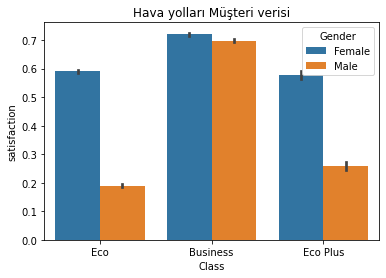

In [ ]:
sns.barplot(x="Class",y="satisfaction",hue="Gender",data=df).set_title("Hava yolları Müşteri verisi");

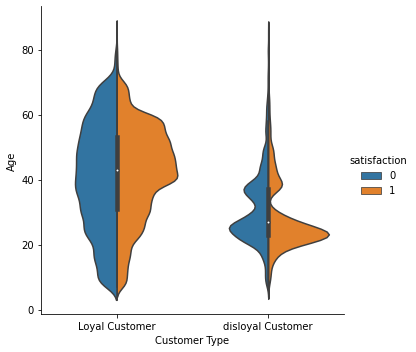

In [ ]:
sns.catplot(data=df,kind="violin",x="Customer Type",y="Age",hue="satisfaction",split=True)

#Data Preprocessing


In [ ]:
df.isnull().sum() #eksik verileri kontrol etme

Gender                          0
Customer Type                   0
Age                             0
Type of Travel                  0
Class                           0
Flight Distance                 0
Seat comfort                    0
Food and drink                  0
Gate location                   0
Inflight wifi service           0
Inflight entertainment          0
Online support                  0
Ease of Online booking          0
On-board service                0
Leg room service                0
Baggage handling                0
Checkin service                 0
Cleanliness                     0
Online boarding                 0
Departure Delay in Minutes      0
Arrival Delay in Minutes      393
satisfaction                    0
dtype: int64

In [ ]:
df["Arrival Delay in Minutes"].value_counts()

0.0       72753
1.0        2747
2.0        2587
3.0        2442
4.0        2373
          ...  
391.0         1
1584.0        1
422.0         1
333.0         1
500.0         1
Name: Arrival Delay in Minutes, Length: 472, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df["Gender_cat"]=LE.fit_transform(df["Gender"])
df["Customer Type_cat"]=LE.fit_transform(df["Customer Type"])
df["Type of Travel_cat"]=LE.fit_transform(df["Type of Travel"])
df["Class_cat"]=LE.fit_transform(df["Class"])

In [ ]:
df.drop(["Gender","Customer Type","Type of Travel","Class"],axis=1, inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
imputer.fit(df)
df[:]=imputer.transform(df)

In [ ]:

Xbin = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile")       
df["Age"] = Xbin.fit_transform(df[["Age"]])

D:\anaconda\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


In [ ]:
Xbin=KBinsDiscretizer(n_bins=5,encode="ordinal",strategy="uniform")
df["Flight Distance"]=Xbin.fit_transform(df[["Flight Distance"]])

In [ ]:
Xbin=KBinsDiscretizer(n_bins=5,encode="ordinal",strategy="uniform")
df["Departure Delay in Minutes"]=Xbin.fit_transform(df[["Departure Delay in Minutes"]])

In [ ]:
Xbin=KBinsDiscretizer(n_bins=5,encode="ordinal",strategy="uniform")
df["Arrival Delay in Minutes "]=Xbin.fit_transform(df[["Arrival Delay in Minutes"]])

In [ ]:
df.head()

,Age,Flight Distance,Seat comfort,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,...,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_cat,Customer Type_cat,Type of Travel_cat,Class_cat,Arrival Delay in Minutes
0,1.0,0.0,0.0,0.0,2.0,2.0,4.0,2.0,3.0,3.0,...,3.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,1.0,1.0,0.0,0.0,3.0,0.0,2.0,2.0,3.0,4.0,...,3.0,2.0,0.0,305.0,1.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,3.0,2.0,0.0,2.0,2.0,3.0,...,4.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0,3.0,3.0,4.0,3.0,1.0,1.0,...,1.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,3.0,4.0,3.0,4.0,2.0,2.0,...,2.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
# MACHİNE LEARNİNG ALGORİTMA ALANINA GİRDİK
#Preparing the Training and Test Set

In [ ]:
X=df.loc[:,:]
y=df.loc[:,"satisfaction"]

In [ ]:
X.drop(["satisfaction"],axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [ ]:
#karar ağaçları
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_test_dt=dt_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc_dt=accuracy_score(y_test,y_test_dt)
acc_dt


0.9374807514628888

In [ ]:
#KNN ALGORİTMASI
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_test_knn=knn_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc_knn=accuracy_score(y_test,y_test_knn)
acc_knn

0.9039369674571399

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_test_nb=nb_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc_nb=accuracy_score(y_test,y_test_nb)
acc_nb

0.8123652602402217

In [ ]:
#DECİSİON TREE
import pickle
with open("dtmodel.pkl","wb")as f:
    pickle.dump(dt_model,f)

In [ ]:
#KNN
import pickle
with open("knnmodel.pkl","wb")as f:
    pickle.dump(knn_model,f)

In [ ]:
#NAİVE BAYES
import pickle 
with open("nbmodel.pkl","wb")as f:
    pickle.dump(nb_model,f)

In [ ]:
# decision tree modelin tahmini
dt_model_2=pickle.load(open("dtmodel.pkl","rb"))
y_test_dt_2=dt_model_2.predict(X_test)
acc_dt_2=accuracy_score(y_test,y_test_dt_2)
acc_dt_2

0.9374807514628888

In [ ]:
# knn modelin tahmini
knn_model_2=pickle.load(open("knnmodel.pkl","rb"))
y_test_knn_2=knn_model_2.predict(X_test)
acc_knn_2=accuracy_score(y_test,y_test_knn_2)
acc_knn_2

0.9039369674571399

In [ ]:
# navie bayes modelin tahmini
nb_model_2=pickle.load(open("nbmodel.pkl","rb"))
y_test_nb_2=nb_model_2.predict(X_test)
acc_nb_2=accuracy_score(y_test,y_test_nb_2)
acc_nb_2

0.8123652602402217

In [ ]:
# MATRİX SONUCLARI
#Decision tree
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_dt_2, labels=[0,1])

array([[16272,  1282],
       [ 1154, 20256]], dtype=int64)

In [ ]:
#KNN
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_knn_2, labels=[0,1])

array([[16106,  1448],
       [ 2295, 19115]], dtype=int64)

In [ ]:
#Naive Bayes
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_nb_2, labels=[0,1])

array([[13187,  4367],
       [ 2944, 18466]], dtype=int64)